In [1]:
import re
import random
import joblib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import PassiveAggressiveClassifier


%matplotlib inline

In [2]:
# https://www.kaggle.com/c/fake-news

# id: unique id for a news article
# title: the title of a news article
# author: author of the news article
# text: the text of the article; could be incomplete
# label: a label that marks the article as potentially unreliable
#     1: unreliable
#     0: reliable

In [3]:
random.seed(0)
np.random.seed(0)

In [4]:
df = pd.read_csv("train.csv")
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [5]:
df.drop(columns=['id', 'title', 'author'], inplace=True)

In [6]:
df.isnull().sum()

text     39
label     0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20761 entries, 0 to 20799
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    20761 non-null  object
 1   label   20761 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 486.6+ KB


0    10387
1    10374
Name: label, dtype: int64


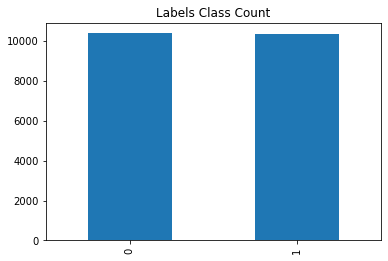

In [9]:
df['label'].value_counts().plot(kind='bar', title='Labels Class Count')
print(df['label'].value_counts())

In [10]:
stop_words = stopwords.words('english')
lemma = WordNetLemmatizer()

In [11]:
def clean_text(text):
    text = text.lower() # lowering
    text = text.encode("ascii", "ignore").decode() # non ascii chars
    text = re.sub(r'\n',' ', text) # remove new-line characters
    text = re.sub(r'\W', ' ', text) # special chars
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text) # single characters
    text = re.sub(r'\^[a-zA-Z]\s+', ' ', text) # single char at first
    text = re.sub(r'[0-9]', ' ', text) # digits
    text = re.sub(r'\s+', ' ', text, flags=re.I) # multiple spaces
    return ' '.join([lemma.lemmatize(word) for word in word_tokenize(text) if word not in stop_words])

In [12]:
df['text'][67]

'Clinton Campaign STUNNED As FBI Reportedly Reopens Probe Into Hillary Clinton Emails Posted on Tweet Home » Headlines » World News » Clinton Campaign STUNNED As FBI Reportedly Reopens Probe Into Hillary Clinton Emails \nA SHOCKING blow to the Clinton Campaign emerged unexpectedly Friday as the FBI has reportedly REOPENED probe into Hillary Clinton’s email server as “The FBI has learned of the existence of emails that appear to be pertinent to the investigation.” \n\n\nHere we go… \nYes. Exactly! \nHe’ll own it once we vote him in there. \nThen he’ll pull the plug and drain it and put all those corrupt SOBs in prison. Maybe you too ; ) \nA ha ha ha ha ha ha ha ha ! \nDrain the swamp! \nReopened!??!?!??!? \nThis monster needs to be opened, all right. \nI’ll leave up to the readers to come up with ways to execute that idea. \nHow many people were there when Nixon was reelected despite the fact that the Watergate investigation was in full swing? That ended pretty badly for Tricky Dick. An

In [13]:
clean_news = []

for text in tqdm(df['text']):
    clean_news.append(clean_text(text))

print(clean_news[67])


clinton campaign stunned fbi reportedly reopens probe hillary clinton email posted tweet home headline world news clinton campaign stunned fbi reportedly reopens probe hillary clinton email shocking blow clinton campaign emerged unexpectedly friday fbi reportedly reopened probe hillary clinton email server fbi learned existence email appear pertinent investigation go yes exactly hell vote hell pull plug drain put corrupt sob prison maybe ha ha ha ha ha ha ha ha drain swamp reopened monster need opened right ill leave reader come way execute idea many people nixon reelected despite fact watergate investigation full swing ended pretty badly tricky dick killer judicial investigation group time group lead democrat fired killer lying dont recall nature lie enough get fired fox news politics fbi director james comey wrote letter top member congress friday bureau learned existence email appear pertinent investigation comey detail email saying surfaced connection unrelated case told lawmaker 

In [14]:
x_train, x_test, y_train, y_test = train_test_split(clean_news, df['label'])
len(x_train), len(x_test)

(15570, 5191)

In [15]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(x_train)
X

<15570x128387 sparse matrix of type '<class 'numpy.float64'>'
	with 4050300 stored elements in Compressed Sparse Row format>

In [16]:
test_X = tfidf.transform(x_test)
test_X

<5191x128387 sparse matrix of type '<class 'numpy.float64'>'
	with 1338465 stored elements in Compressed Sparse Row format>

In [17]:
mnb = MultinomialNB()
mnb.fit(X, y_train)

pred_mnb = mnb.predict(test_X)

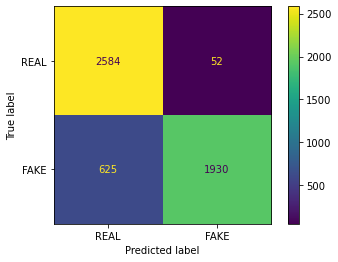

In [18]:
plot_confusion_matrix(mnb, test_X, y_test, display_labels=['REAL', 'FAKE'])
plt.show()

In [19]:
print(f"Accuracy score : {accuracy_score(y_test, pred_mnb)}")

Accuracy score : 0.8695819687921402


In [20]:
pac = PassiveAggressiveClassifier()
pac.fit(X, y_train)

pred_pac = pac.predict(test_X)

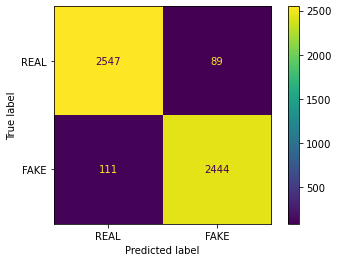

In [21]:
plot_confusion_matrix(pac, test_X, y_test, display_labels=['REAL', 'FAKE'])
plt.show()

In [22]:
print(f"Accuracy score : {accuracy_score(y_test, pred_pac)}")

Accuracy score : 0.9614717780774418


In [23]:
joblib.dump([tfidf, mnb, pac], 'checkpoint.joblib')

['checkpoint.joblib']